In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/end-to-end-ml-placement-csv/placement.csv


In [32]:
df = pd.read_csv("/kaggle/input/end-to-end-ml-placement-csv/placement.csv")

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df.shape

(100, 4)

In [10]:
# pandas (Preprocess)
df = df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [13]:
# EDA(Exploitary Data Analysis)
import matplotlib.pyplot as plt

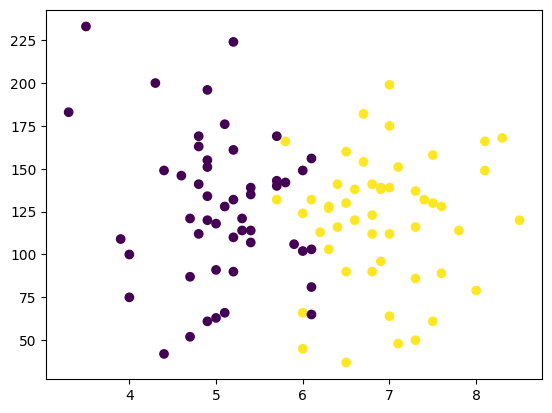

In [15]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [ ]:
# Logistic Regression Model

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [13]:
y.shape

(100,)

In [ ]:
# 3. Train test split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [17]:
X_train

,Unnamed: 0,cgpa
86,86,5.1
85,85,5.8
74,74,6.7
98,98,6.3
16,16,5.2
...,...,...
99,99,6.2
48,48,6.6
56,56,6.1
93,93,6.8


In [18]:
y_train

86    0
85    1
74    1
98    1
16    0
     ..
99    1
48    1
56    0
93    1
88    0
Name: placement, Length: 90, dtype: int64

In [19]:
X_test

,Unnamed: 0,cgpa
4,4,5.8
21,21,7.1
63,63,6.3
94,94,4.7
89,89,4.9
67,67,5.0
10,10,6.0
92,92,5.2
68,68,4.0
47,47,5.2


In [ ]:
# 2. Scale the values 

In [35]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_train

array([[ 1.30807201, -0.83107584],
       [ 1.27287725, -0.22155572],
       [ 0.88573486,  0.56211299],
       [ 1.73040916,  0.21381579],
       [-1.15556137, -0.74400153],
       [ 1.16729296,  0.38796439],
       [-0.24049754,  1.34578171],
       [-1.71867758,  0.64918729],
       [-0.69802946,  0.8233359 ],
       [ 0.8505401 , -1.00522444],
       [ 0.95612439, -1.00522444],
       [ 0.42820295,  1.0845588 ],
       [-1.26114566,  0.30089009],
       [ 0.18183961,  0.30089009],
       [-0.80361375,  0.8233359 ],
       [-0.9443928 , -1.00522444],
       [-0.87400327, -1.17937304],
       [ 1.09690344, -1.00522444],
       [-1.54270376,  0.9104102 ],
       [-1.40192471, -0.83107584],
       [-1.01478232,  0.47503869],
       [-1.507509  , -0.30863003],
       [ 0.92092962, -1.09229874],
       [-1.12036661, -2.39841327],
       [-0.55725041, -0.04740712],
       [ 1.02651391,  0.03966718],
       [ 0.04106056, -2.22426466],
       [ 1.23768249, -0.30863003],
       [ 1.1320982 ,

In [37]:
X_test = scaler.transform(X_test)

In [27]:
X_test

array([[ 4. ,  5.8],
       [21. ,  7.1],
       [63. ,  6.3],
       [94. ,  4.7],
       [89. ,  4.9],
       [67. ,  5. ],
       [10. ,  6. ],
       [92. ,  5.2],
       [68. ,  4. ],
       [47. ,  5.2]])

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression()

In [40]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

In [47]:
# 5. Evaluate the model/model selection
y_pred = clf.predict(X_test)

In [48]:
y_test

53    1
92    0
21    1
25    0
11    1
14    0
35    1
56    0
82    1
13    1
Name: placement, dtype: int64

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test, y_pred)

0.9

In [ ]:
# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [54]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

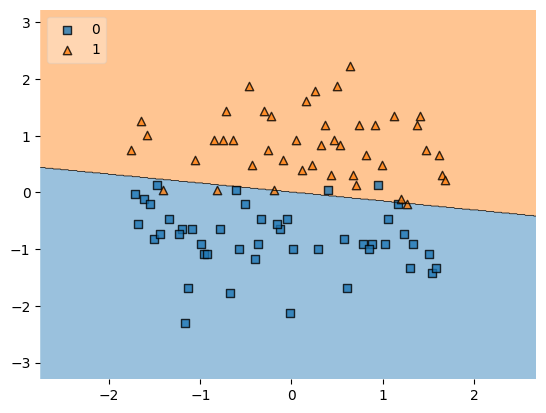

In [56]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [58]:
import pickle

In [61]:
pickle.dump(clf,open('model.pkl','wb'))

In [7]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values 
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model